<a href="https://colab.research.google.com/github/claudiaxpreda/SII/blob/main/SII_TRAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import string
import nltk


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
WORKDIR = os.getcwd()

DATASET_DIR = 'trac1-dataset/'
DATASET_DIR2 = 'trac2-shared-task-dataset/release_files'

TRAIN_FILE = 'agr_en_train.csv'
VAL_FILE = 'agr_en_dev.csv'
TEST_TW_FILE = 'agr_en_tw_gold.csv'
TEST_FB_FILE = 'agr_en_fb_gold.csv'
def get_train_files(name):
  return WORKDIR + '/drive/MyDrive/SII/' + DATASET_DIR + 'english/' + name

def get_test_files(name): 
  return WORKDIR + '/drive/MyDrive/SII/' + DATASET_DIR + 'trac-gold-set/' + name

In [ ]:
TRAIN = 1
TEST = 2

def get_data(name, type):
  if type == TRAIN:
    return pd.read_csv(get_train_files(name))
  else:
    return pd.read_csv(get_test_files(name))

In [ ]:
train_frame = get_data(TRAIN_FILE, TRAIN)
val_frame = get_data(VAL_FILE, TRAIN)
test_fb_frame = get_data(TEST_FB_FILE, TEST)
test_tw_frame = get_data(TEST_TW_FILE, TEST)

print("Train set size: " + str(len(train_frame)))
print("Val set size: " + str(len(val_frame)))
print("Test facebook set size: " + str(len(test_fb_frame)))
print("Test twitter set size: " + str(len(test_tw_frame)))

Train set size: 11998
Val set size: 3000
Test facebook set size: 915
Test twitter set size: 1256


In [ ]:
get_train_files(TRAIN_FILE)

'/content/drive/MyDrive/SII/trac1-dataset/english/agr_en_train.csv'

In [ ]:
def add_columns_name(data):
  data.columns = ['unique_id', 'text', 'agression_level']

add_columns_name(train_frame)
add_columns_name(val_frame)
add_columns_name(test_fb_frame)
add_columns_name(test_tw_frame)

In [ ]:
print("--- TRAIN, VAL")
print("NAG  {}, {}".format(
    np.sum(train_frame.agression_level == 'NAG'),
    np.sum(val_frame.agression_level == 'NAG')))


print("OAG  {}, {}".format(
    np.sum(train_frame.agression_level == 'OAG'),
    np.sum(val_frame.agression_level == 'OAG')))


print("CAG  {}, {}".format(
    np.sum(train_frame.agression_level == 'CAG'),
    np.sum(val_frame.agression_level == 'CAG')))

--- TRAIN, VAL
NAG  5051, 1233
OAG  2707, 711
CAG  4240, 1056


In [ ]:
data = pd.concat([train_frame, val_frame])

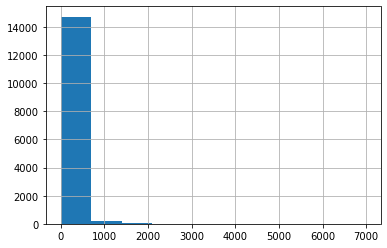

In [ ]:
# Words length
lens = data.text.str.len()
lens.mean(), lens.std(), lens.max()
lens.hist()

In [ ]:
data_analyze = data.drop(["unique_id"], axis=1)
data_analyze.iloc[1000:1012]


,text,agression_level
1000,..but govt want to take control over supreme c...,CAG
1001,http://indianexpress.com/article/india/fatwa-i...,CAG
1002,... Why would this Muslim country ban people f...,CAG
1003,Nbcc best Infra company will declare rs 5 per ...,NAG
1004,INDIAN express is now BELOW STANDARD,CAG
1005,Indeed they are genuine and true Freedom Fight...,NAG
1006,but then we know where america stands today. w...,CAG
1007,"Maulana is right,,,,,, it seems he understands...",CAG
1008,Jude we elect our representative. Average turn...,OAG
1009,Please somebody tell her that CLEAN INDIA Miss...,NAG


In [ ]:
print(data_analyze.text.iloc[100])

r u guys from dis university? Gaurav Seth PJ Anshu Mishra Shubham Singh


In [ ]:
def clean_text(text):
  text = re.sub("@\S+", " ", text)
  text = re.sub("https*\S+", " ", text)
  text = re.sub("#\S+", " ", text)
  text = re.sub("\'\w+", '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub(r'\w*\d+\w*', '', text)
  text = re.sub('\s{2,}', " ", text)
  emoji_clean = re.compile("["
                    u"\U0001F600-\U0001F64F"  # emoticons
                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+", flags=re.UNICODE)
  text = emoji_clean.sub(r'', text)

  return text

def lemm_data(comment):
  lemm = WordNetLemmatizer()
  lemm_words = [lemm.lemmatize(word.lower()) for word in comment] 
  return lemm_words

def remove_stopwords(text):
  words = [word for word in text if not word in stopwords.words()]
  return words 

def apply_clean_data(data, tag, new_tag):
  data[new_tag] = data[tag].apply(lambda z: clean_text(z))

def apply_tokenization(data, tag):
  data[tag] = data[tag].apply(lambda z: word_tokenize(z))

def apply_lemm_data(data, tag):
  data[tag]=data[tag].apply(lambda z: lemm_data(z))

def apply_remove_stopwords(data, tag):
  data[tag]=data[tag].apply(lambda z: remove_stopwords(z))

def apply_join(data, tag):
  data[tag]=data[tag].apply(lambda z: " ".join(z))


def apply_text_processing(data):
  apply_clean_data(data, 'text', 'clean_text')
  apply_tokenization(data, 'clean_text')
  apply_lemm_data(data, 'clean_text')
  apply_remove_stopwords(data, 'clean_text')
  apply_join(data, 'clean_text')

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

print(gpus)



with tf.device('/device:GPU:0'):
  apply_text_processing(train_frame)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
train_frame.clean_text.iloc[4]

'wondering educated ambassador struggling pay credit debit decent restaurant cant imagine diplomat developed nation card need cash dinner'

In [ ]:
apply_text_processing(val_frame)
val_frame.clean_text.iloc[5]

'mr ashwini gujral said nifty touch likely nifty test'

In [ ]:
add_columns_name(test_fb_frame)
add_columns_name(test_tw_frame)
apply_text_processing(test_fb_frame)
test_fb_frame

,unique_id,text,agression_level,clean_text
0,facebook_corpus_msr_422473,So now we know. The women should be under the ...,NAG,know woman veil dumb country made think cool
1,facebook_corpus_msr_341422,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ हो जाओगे,NAG,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ जाओगे
2,facebook_corpus_msr_481654,Do you think markets are gonna be sideways til...,NAG,think market gon sideways result
3,facebook_corpus_msr_427757,Jago Urjut Jago....\nSave common people from\n...,NAG,jago urjut jago save common people reducing re...
4,facebook_corpus_msr_469689,The point of demonetization is to stop use of ...,NAG,point demonetization stop use cash way india i...
...,...,...,...,...
910,facebook_corpus_msr_322509,"Where is that illegitimate kid o communists, c...",CAG,illegitimate kid communist congressis presstit...
911,facebook_corpus_msr_397216,Anil Chaurasia galian men bhi de sakta hon kyu...,OAG,anil chaurasia galian bhi sakta kyun apni maa ...
912,facebook_corpus_msr_466506,Never opened his mouth when PM..now he speaks....,OAG,never opened mouth pm speaks better shut mouth...
913,facebook_corpus_msr_441285,Chit fund operators n loan sharks r more honest,CAG,chit fund operator loan shark r honest


In [ ]:
apply_text_processing(test_tw_frame)
test_tw_frame

,unique_id,text,agression_level,clean_text
0,sme_2,@sardanarohit :While entire nation is praying ...,OAG,entire nation praying siachin brave heart pay ...
1,sme_3,shoaib: wahab riaz looks like johnson. kapil d...,NAG,shoaib wahab riaz look like johnson kapil dev ...
2,sme_4,"ramraj cottons r. ashwin southindian , chennai...",NAG,ramraj cotton r ashwin southindian chennai ian...
3,sme_5,#indvsuae jeet gaye... :) :) cmon starsports n...,NAG,jeet gaye cmon starsports naya dikhayo ab
4,sme_6,tt india 08:24 1.#indvspak 2.#mustwatchmsg 3.#...,NAG,tt india rega jha congrats team india giroud
...,...,...,...,...
1251,sme_1253,#ShutdownJNU Pls dnt take police actn ths tym....,OAG,pls dnt police actn th tym send paramilitary h...
1252,sme_1254,@IchbinUjjaini what the hell? Do you even know...,OAG,hell even know difference anti national opposi...
1253,sme_1255,"#standwithJNU one of the worst authorities, sa...",OAG,worst authority sadist authority deriving plea...
1254,sme_1256,#ShutDownJNU where r so called secular ppl.. #...,OAG,r called secular ppl amir srk rahul comment si...


In [ ]:
def create_tag(data):
    data['tag'] = np.where(data['agression_level'] == 'NAG', 0, 2)
    data['tag'] = np.where(data['agression_level'] == 'CAG', 1, data.tag)

In [ ]:
create_tag(train_frame)
create_tag(val_frame)
create_tag(test_fb_frame)
create_tag(test_tw_frame)
val_frame.head(5)

,unique_id,text,agression_level,clean_text,tag
0,facebook_corpus_msr_334368,@siva \nHow is ur mother???\nHow is ur wife???...,NAG,ur mother ur wife ur sister hope everyone fine,0
1,facebook_corpus_msr_331195,Also see ....hw ur RSS activist caught in Burk...,NAG,see hw ur r activist caught burkha throwing be...,0
2,facebook_corpus_msr_403402,On the death of 2 jawans in LOC CROSS FIRING\n...,NAG,death jawan loc cross firing home minister mus...,0
3,facebook_corpus_msr_379239,Modi ho ya Manmohan singh saala yeh log kuch n...,OAG,modi manmohan singh saala yeh log kuch ny kart...,2
4,facebook_corpus_msr_2111264,No discrimination in policies and NON protecti...,CAG,discrimination policy protectionism perhaps fu...,1


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Dropout, Activation, Input
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import text, sequence



max_features = 30000
maxlen = 600

data = pd.concat([train_frame, val_frame])
fit_list = data.clean_text.fillna('other').values
list_sentences_train = data.clean_text.fillna('other').values
list_sentences_val = val_frame.clean_text.fillna('other').values
list_sentences_test_fb = test_fb_frame.clean_text.fillna('other').values
lis_sentences_test_tw = test_tw_frame.clean_text.fillna('other').values



In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(data.tag.values, num_classes=3)
Y_val = to_categorical(val_frame.tag.values)
Y_test_fb = to_categorical(test_fb_frame.tag.values, num_classes=3)
Y_test_tw = to_categorical(test_tw_frame.tag.values, num_classes=3)

print(Y_train.shape)

(14998, 3)


In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(fit_list))

list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_val = tokenizer.texts_to_sequences(list_sentences_val)

list_tokenized_test_fb = tokenizer.texts_to_sequences(list_sentences_test_fb)
list_tokenized_test_tw = tokenizer.texts_to_sequences(lis_sentences_test_tw)

X_train = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen)
X_val = sequence.pad_sequences(list_tokenized_val, maxlen=maxlen)
X_te_fb = sequence.pad_sequences(list_tokenized_test_fb, maxlen=maxlen)
X_te_tw = sequence.pad_sequences(list_tokenized_test_tw, maxlen=maxlen)

In [ ]:
def get_model():
    embed_size = 64
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.25)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(3, activation="softmax")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tfa.metrics.F1Score(num_classes=3, average='macro')])


    return model

get_model().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 600)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 600, 64)           1920000   
_________________________________________________________________
bidirectional (Bidirectional (None, 600, 100)          46000     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0     

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

model = get_model()
batch_size = 128
epochs = 15

# X_t, X_v,Y_t, Y_v = train_test_split(X_train, Y_train, test_size=0.33)
# file_path="weights_base.best.hdf5"
# checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


early = EarlyStopping(monitor="val_loss", mode="min", patience=20)



model2 = Sequential()
model2.add(Embedding(30000, 128))
model2.add(LSTM(units = 64, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
model2.add(LSTM(units = 64, dropout = 0.2, recurrent_dropout = 0.2))
model2.add(Dense(units = 3, activation = 'softmax'))

callbacks_list = [early] #early


model2.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tfa.metrics.F1Score(num_classes=3, average='macro')])

with tf.device('/device:GPU:0'):
  history = model2.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=batch_size, epochs=epochs, callbacks=callbacks_list)

# print(X_t.shape)
# print(Y_v.shape)

Epoch 1/15
118/118 [==============================] - 535s 4s/step - loss: 1.0395 - accuracy: 0.4420 - recall_4: 0.0815 - precision_4: 0.5138 - f1_score: 0.3016 - val_loss: 0.8023 - val_accuracy: 0.6470 - val_recall_4: 0.3490 - val_precision_4: 0.8072 - val_f1_score: 0.6052
Epoch 2/15
118/118 [==============================] - 525s 4s/step - loss: 0.7752 - accuracy: 0.6478 - recall_4: 0.5018 - precision_4: 0.7276 - f1_score: 0.6205 - val_loss: 0.5694 - val_accuracy: 0.7873 - val_recall_4: 0.7000 - val_precision_4: 0.8582 - val_f1_score: 0.7769
Epoch 3/15
118/118 [==============================] - 524s 4s/step - loss: 0.5420 - accuracy: 0.7831 - recall_4: 0.7241 - precision_4: 0.8252 - f1_score: 0.7723 - val_loss: 0.3830 - val_accuracy: 0.8697 - val_recall_4: 0.8097 - val_precision_4: 0.9149 - val_f1_score: 0.8672
Epoch 4/15
118/118 [==============================] - 526s 4s/step - loss: 0.3835 - accuracy: 0.8551 - recall_4: 0.8231 - precision_4: 0.8808 - f1_score: 0.8499 - val_loss: 0.

In [ ]:
import pickle
with open(WORKDIR + "/drive/MyDrive/SII/train_lstm_v2", 'wb') as file_pi:
  pickle.dump(history.history, file_pi)




In [ ]:
model2.save_weights("/content/drive/MyDrive/SII/LSTM_model.h5")


In [ ]:
y_test = model2.evaluate(X_te_fb, Y_test_fb, batch_size=128)


In [ ]:
y_test = model2.evaluate(X_te_tw, Y_test_tw, batch_size=128)


In [ ]:
y_test = model.predict(X_te_fb, batch_size=128)


In [ ]:
train_frame.to_csv(path_or_buf="/content/drive/MyDrive/SII/train_pre.csv", index=False)

In [ ]:
val_frame.to_csv(path_or_buf="/content/drive/MyDrive/SII/val_pre.csv", index=False)

In [ ]:
test_fb_frame.to_csv(path_or_buf="/content/drive/MyDrive/SII/test_fb_pre.csv", index=False)

In [ ]:
test_tw_frame.to_csv(path_or_buf="/content/drive/MyDrive/SII/test_tw_pre.csv", index=False)

In [ ]:
pd.read_csv("/drive/MyDrive/SII/test_tw_pre.csv").head()

,unique_id,text,agression_level,clean_text,tag
0,sme_2,@sardanarohit :While entire nation is praying ...,OAG,entire nation praying siachin brave heart pay ...,2
1,sme_3,shoaib: wahab riaz looks like johnson. kapil d...,NAG,shoaib wahab riaz look like johnson kapil dev ...,0
2,sme_4,"ramraj cottons r. ashwin southindian , chennai...",NAG,ramraj cotton r ashwin southindian chennai ian...,0
3,sme_5,#indvsuae jeet gaye... :) :) cmon starsports n...,NAG,jeet gaye cmon starsports naya dikhayo ab,0
4,sme_6,tt india 08:24 1.#indvspak 2.#mustwatchmsg 3.#...,NAG,tt india rega jha congrats team india giroud,0
